In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('mymoviedb.csv',lineterminator='\n')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [5]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9822    False
9823    False
9824    False
9825    False
9826    False
Length: 9827, dtype: bool

In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [ ]:
# Exploration Summary

# we have a dataframe consisting of 9827 rows and 9 columns.

# our dataset looks a bit tidy with no NaNs nor duplicated values.

# Release Date column needs to be casted into date time and to extract only the year value.

# Overview, Original_Languege and Poster-Url wouldn't be so useful during analysis so we'll drop there

# there is noticable outliers in Popularity column

# Vote Average bettter be categorised for proper analysis.

# Genre column has comma saperated values and white spaces that needs to be handled and casted into category.

In [8]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [9]:
df['Release_Date']=df['Release_Date'].dt.year

df['Release_Date'].dtypes

dtype('int32')

In [10]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [11]:
cols=['Overview','Original_Language','Poster_Url']
df.drop(cols, axis=1, inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [12]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [14]:
def categorize_col(df,col,labels):
    edges=[df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df
        

In [15]:
labels=['not_popular','below_avg','Average','Popular']
categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['Popular', 'below_avg', 'Average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'Average' < 'Popular']

In [16]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [17]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
Popular        2450
Average        2412
below_avg      2398
Name: count, dtype: int64

In [18]:
df['Genre']= df['Genre'].str.split(', ')

df=df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


# data visualization

In [19]:
sns.set_style('whitegrid')

In [20]:
df['Genre'].describe()

count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

# What is the most frequent genre in the dataset?

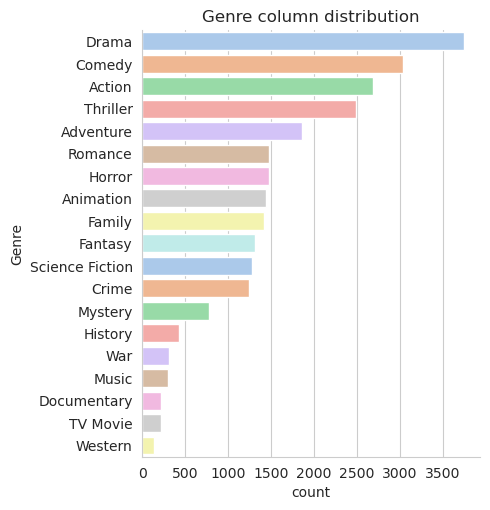

In [21]:
sns.catplot(y='Genre',
            data=df,
            kind='count',
            order=df['Genre'].value_counts().index,
            palette='pastel')
plt.title('Genre column distribution')
plt.show()

# Which has the highest votes in votes avg column

In [23]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


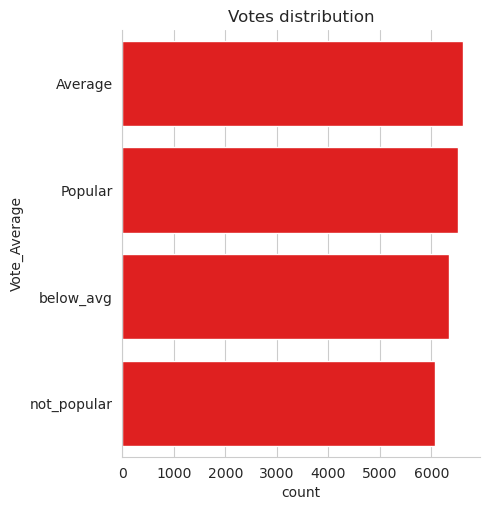

In [24]:
sns.catplot(y='Vote_Average',
            data=df,
            kind='count',
           order=df['Vote_Average'].value_counts().index,
            color='red'
           )
plt.title('Votes distribution')
plt.show()

# what movie got the highest popularity ?what is its genre ?

In [25]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure


In [26]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


# what movie got the lowest popularity ?what is its genre ?

In [27]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25790,1984,Threads,13.354,186,Popular,War
25791,1984,Threads,13.354,186,Popular,Drama
25792,1984,Threads,13.354,186,Popular,Science Fiction


# which year has the most filmed movies?

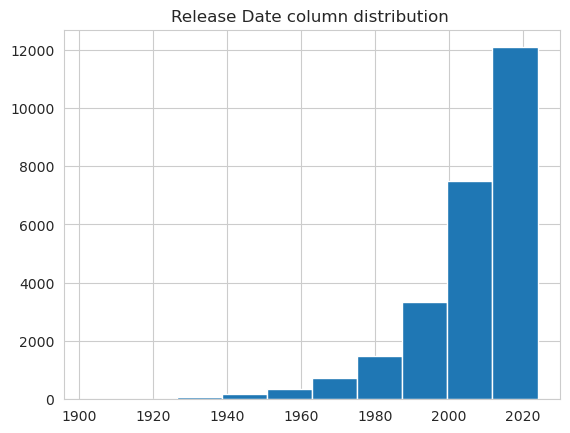

In [28]:
df['Release_Date'].hist()
plt.title('Release Date column distribution ')
plt.show()

In [ ]:
Conclusion

Q1 : What is the most frequent genre in the dataset?
ANS: Drama genre is the most frequent genre in our dataset and has appeared more than 14% in 19 other genres
 
Q2 : Which has the highest votes in votes average column?
ANS: Drama genre has the highest popularity among fans

Q3 : What movie got the highest popularity ?what is its genre ?
ANS: Spider-Man: No Way Home has the highest popularity	rate with genre Action, Adventure, Science Fiction

Q4:what movie got the lowest popularity ?what is its genre ?
ANS:The United States vs. Billie Holiday and Threads with genre Music,Drama ,histroy and War,Drama,Science Fiction

Q5:which year has the most filmed movies?
ANS:Year 2020 has the most filmed movies